In [ ]:
import codecs,math,pickle
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mplt
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("poster")
sns.set_palette("husl")

In [ ]:
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
nomRepertoire="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
#nomFlexiqueVerbes="/Users/gilles/Github/flexique/data/vlexique.csv"
nomLexiqueOrg="/Users/gilles/Dropbox/Travail/Recherche/BoKu/LingInfo/Lexique3/Lexique381/Lexique381.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t",encoding="utf8")
#vlexique=pd.read_csv(nomFlexiqueVerbes,sep=",",header=None)

In [ ]:
Lexique3.columns#, vlexique.columns

In [51]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","7_freqlemfilms2","8_freqlemlivres","9_freqfilms2","10_freqlivres","11_infover"]]

- extraction des verbes de Lexique3 => *verb3*

In [52]:
lex3.loc[:,"7_freqlemfilms2"]=lex3.loc[:,"7_freqlemfilms2"].astype(float)
lex3.loc[:,"8_freqlemlivres"]=lex3.loc[:,"8_freqlemlivres"].astype(float)
lex3.loc[:,"9_freqfilms2"]=lex3.loc[:,"9_freqfilms2"].astype(float)
lex3.loc[:,"10_freqlivres"]=lex3.loc[:,"10_freqlivres"].astype(float)

In [53]:
lex3.rename(columns={'11_infover':'lex3_11_infover'}, inplace=True)

In [54]:
verb3=lex3[lex3["4_cgram"]=="VER"]

- élimination des infover mal formés
 - liste des 412 problèmes
 - remplacement des infover problématiques par un tag cohérent

In [55]:
verb3[(verb3["lex3_11_infover"].str.split(";").apply(set).str.len()!=verb3["lex3_11_infover"].str.split(";").str.len())]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
481,abriter,abRite,abriter,VER,NaN,NaN,7.92,26.22,2.37,6.96,inf;;inf;;inf;;
659,absous,apsu,absoudre,VER,m,NaN,2.66,3.72,1.15,1.08,imp:pre:2s;ind:pre:1s;par:pas;par:pas;par:pas;
1094,accompagner,ak§paNe,accompagner,VER,NaN,NaN,90.56,124.46,24.87,22.23,inf;;
1729,acheté,aS°te,acheter,VER,m,s,290.70,148.38,72.38,28.72,par:pas;par:pas;par:pas;
1864,acquis,aki,acquérir,VER,m,NaN,8.30,29.66,3.52,13.65,ind:pas:1s;par:pas;par:pas;
2328,admirer,admiRe,admirer,VER,NaN,NaN,32.39,68.18,6.50,17.64,inf;;
2346,admis,admi,admettre,VER,m,NaN,50.05,59.46,6.74,11.35,ind:pas:1s;par:pas;par:pas;
2871,afficher,afiSe,afficher,VER,NaN,NaN,8.35,19.26,2.06,3.78,inf;;
2970,affirmé,afiRme,affirmer,VER,m,s,15.61,63.51,1.66,4.59,imp:pre:2s;par:pas;par:pas;
3040,affoler,afole,affoler,VER,NaN,NaN,5.92,20.54,1.00,2.50,inf;;


### Supprimer les tags incorrects
- imp:pre:3s n'existe pas en français

In [56]:
verb3.loc[:,"lex3_11_infover"]=verb3.loc[:,"lex3_11_infover"].str.replace("imp:pre:3s;","")

In [57]:
verb3[verb3["lex3_11_infover"].str.contains("imp:pre:3s")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover


### réparer les infover
1. effacer les ; finaux
1. couper sur les ;
1. éliminer les doublons
1. trier la liste
1. assembler la liste et ajouter un ; final
1. créer la colonne 11_infover corrigée

In [13]:
verb3.loc[:,"11_infover"]=verb3.loc[:,"lex3_11_infover"].str.strip(";").str.split(";").apply(set).apply(list).apply(sorted).str.join(";").str.strip(";")+";"

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [14]:
verb3

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,ind:pre:3s;,ind:pre:3s;
18,abaissa,abEsa,abaisser,VER,NaN,NaN,4.93,18.04,0.00,2.64,ind:pas:3s;,ind:pas:3s;
19,abaissai,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.10,0.07,ind:pas:1s;,ind:pas:1s;
20,abaissaient,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.00,0.41,ind:imp:3p;,ind:imp:3p;
21,abaissait,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.02,2.50,ind:imp:3s;,ind:imp:3s;
23,abaissant,abEs@,abaisser,VER,NaN,NaN,4.93,18.04,0.01,2.50,par:pre;,par:pre;
26,abaisse,abEs,abaisser,VER,NaN,NaN,4.93,18.04,1.28,3.45,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s;ind:pre:1s;ind:pre:3s;
29,abaissent,abEs,abaisser,VER,NaN,NaN,4.93,18.04,0.05,0.95,ind:pre:3p;,ind:pre:3p;
30,abaisser,abese,abaisser,VER,NaN,NaN,4.93,18.04,1.09,2.91,inf;,inf;
31,abaissera,abEs°Ra,abaisser,VER,NaN,NaN,4.93,18.04,0.19,0.07,ind:fut:3s;,ind:fut:3s;


In [15]:
verb3[verb3["3_lemme"]=="aimer"]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
3967,aima,Ema,aimer,VER,NaN,NaN,1655.07,795.61,0.41,1.69,ind:pas:3s;,ind:pas:3s;
3971,aimai,EmE,aimer,VER,NaN,NaN,1655.07,795.61,0.20,0.81,ind:pas:1s;,ind:pas:1s;
3972,aimaient,EmE,aimer,VER,NaN,NaN,1655.07,795.61,6.20,16.42,ind:imp:3p;,ind:imp:3p;
3973,aimais,EmE,aimer,VER,NaN,NaN,1655.07,795.61,58.07,57.16,ind:imp:1s;ind:imp:2s;,ind:imp:1s;ind:imp:2s;
3974,aimait,EmE,aimer,VER,NaN,NaN,1655.07,795.61,49.57,128.72,ind:imp:3s;,ind:imp:3s;
3977,aimant,Em@,aimer,VER,NaN,NaN,1655.07,795.61,2.60,3.92,par:pre;,par:pre;
3991,aimasse,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.02,0.00,sub:imp:1s;,sub:imp:1s;
3992,aimassent,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.20,sub:imp:3p;,sub:imp:3p;
3993,aimassions,Emasj§,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.07,sub:imp:1p;,sub:imp:1p;
3994,aime,Em,aimer,VER,NaN,NaN,1655.07,795.61,751.29,257.57,imp:pre:2s;ind:pre:1s;ind:pre:1s;ind:pre:3s;su...,imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:1s;su...


In [16]:
verb3.groupby("11_infover")[["11_infover"]].count()

,11_infover
11_infover,
cnd:pre:1p;,242
cnd:pre:1s;,388
cnd:pre:1s;cnd:pre:2s;,567
cnd:pre:2p;,351
cnd:pre:2s;,54
cnd:pre:3p;,931
cnd:pre:3s;,1683
imp:pre:1p;,233
imp:pre:1p;ind:imp:1p;ind:pre:1p;,1


# Calculs pour Caveats with Entropy

## Préparations des données
- flemme regroupe toutes les cases d'un même lemme

In [17]:
flemme=verb3.groupby(by="3_lemme")[["11_infover"]].sum()

- calcul du nombre de cases par lemme

In [18]:
flemme["11_infover"].str.split(";").apply(set).str.len().sort_values()[-20:]

3_lemme
sentir       43
partir       43
mettre       43
dire         43
chercher     43
prendre      43
connaître    44
trouver      44
croire       44
vouloir      44
donner       44
pouvoir      44
passer       44
parler       44
savoir       45
devoir       46
aimer        46
faire        48
avoir        48
être         49
Name: 11_infover, dtype: int64

In [19]:
print len(flemme[flemme.index=="essayer"]["11_infover"].str.split(";").apply(set).values[0])

38


- ajout du genre et du nombre sur les cases du participe passé

In [20]:
def infoVer(row):
    genre=""
    nombre=""
    if isinstance(row["11_infover"],str) and "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str):
            genre=[row["5_genre"]]
        else:
            genre=["m","f"]
        if isinstance(row["6_nombre"],str):
            nombre=[row["6_nombre"]]
        else:
            nombre=["s","p"]
        participes=";".join(["par:pas:"+g+n for g in genre for n in nombre])
        return row["11_infover"].replace("par:pas",participes)
    elif isinstance(row["11_infover"],str) and not "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str) or isinstance(row["6_nombre"],str):
            print "PB avec %s, genre ou nombre sans participe passé"%row["1_ortho"]
        return row["11_infover"]
    else:
        return row["11_infover"]

In [21]:
verb3.loc[:,"infover"]=verb3.apply(lambda x: infoVer(x),axis=1)

In [22]:
verb3[(verb3["11_infover"].str.contains("par:pas")) & (verb3["3_lemme"]=="mettre")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover,infover
82937,mis,mi,mettre,VER,m,NaN,1004.83,1083.72,228.57,245.68,ind:pas:1s;ind:pas:2s;par:pas;par:pas;par:pas;...,ind:pas:1s;ind:pas:2s;par:pas;,ind:pas:1s;ind:pas:2s;par:pas:ms;par:pas:mp;
82953,mise,miz,mettre,VER,f,s,1004.83,1083.72,35.33,46.69,par:pas;,par:pas;,par:pas:fs;
82965,mises,miz,mettre,VER,f,p,1004.83,1083.72,5.36,9.05,par:pas;,par:pas;,par:pas:fp;


In [23]:
colVerbLex3=['1_ortho','2_phon','3_lemme','4_cgram','5_genre','6_nombre','7_freqlemfilms2','8_freqlemlivres','9_freqfilms2','10_freqlivres','infover']
verbLex3=verb3[colVerbLex3].copy()
verbLex3.rename(columns={'infover':'11_infover'}, inplace=True)
verbLex3.to_csv(nomRepertoire+"Verbes3.csv",sep="\t",encoding="utf8",index=False)

IOError: [Errno 2] No such file or directory: '/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/Verbes3.csv'

- ajout d'une colonne pour le nombre de cases de chaque lemme

In [24]:
flemme=verb3.groupby(by="3_lemme")[["infover"]].sum()
flemme["nbSet"]=flemme["infover"].str.split(";").apply(set).str.len()-1

In [25]:
flemme.sort_values("nbSet")

,infover,nbSet
3_lemme,,
facetter,par:pas:mp;,1
co-habiter,inf;,1
co-exister,inf;,1
mannequiner,ind:pre:3s;,1
terrir,par:pas:ms;,1
manutentionner,inf;,1
manéger,par:pas:mp;,1
maquereauter,inf;,1
co-signer,inf;,1


- calcul du nombre de lemmes avec exactement une seule forme réparti par nom de case

In [26]:
flemme[(flemme["nbSet"]==1)].groupby(by="infover").count().sort_values("nbSet")

,nbSet
infover,
sub:pre:3s;,1
sub:imp:3s;,1
sub:imp:1s;,1
sub:pre:2s;,1
ind:pre:1p;,1
inf;inf;,2
ind:imp:1p;,2
ind:pas:2s;,2
imp:pre:1p;,3


## Quelle influence pour le imparfait 4/5 et le subjonctif 4/5
- combien des lexèmes ont exactement une seule forme dans Lex3 qui appartient à cette zone
 - 2 : sélecter et impulser
 - tous les deux des confusions probables avec les noms pluriels : sélections et impulsions
  - leur fréquence est 0 pour livres et le minimum 0.01 pour films

In [139]:
flemme[(flemme["infover"].str.contains("(ind:imp|sub:pre):(1|2)p")) & (flemme["nbSet"]==1)]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
impulser,ind:imp:1p;,1
sélecter,ind:imp:1p;,1


In [140]:
lex3[lex3["1_ortho"].isin(["sélections","impulsions"])]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
69193,impulsions,5pylsj§,impulser,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;
69194,impulsions,5pylsj§,impulsion,NOM,f,p,4.58,8.38,1.58,2.36,NaN
126414,sélections,selEksj§,sélection,NOM,f,p,4.69,2.64,0.24,0.27,NaN
126415,sélections,selEktj§,sélecter,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;


## Verbes sans formes fondamentales
- Combien de verbes n'ont aucune des formes fondamentales (infinitif, participe passé/présent, indicatif présent) ?
 - 135
- Combien de formes ont-ils ?
 - 1 forme : 114
 - 2 formes : 20
 - 3 formes :1

In [141]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
abouter,ind:imp:3s;imp:pre:1p;,2
aboutonner,ind:pas:1s;,1
abricoter,imp:pre:2p;,1
accalmir,ind:pas:3s;,1
acter,ind:pas:3s;ind:imp:1p;sub:pre:1p;,3
adire,ind:fut:3s;,1
agneler,ind:pas:3s;,1
aguiller,ind:fut:3s;,1
alper,ind:pas:3s;,1


In [142]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover
nbSet,
1,114
2,20
3,1


In [143]:
%matplotlib inline

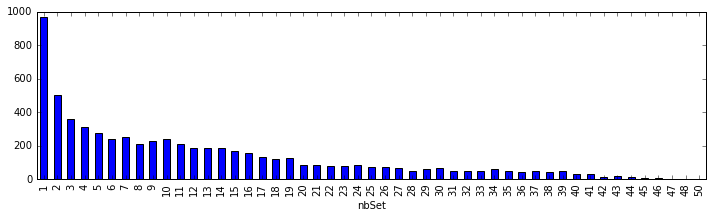

In [144]:
flemme.groupby(by="nbSet")["nbSet"].count().plot(kind="bar",figsize=(12,3))

In [145]:
print len(flemme[flemme.index=="distraire"]["infover"].str.split(";").apply(set).values[0])

27


In [146]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["3_lemme"]=="distraire")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
37707,distraie,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.02,0.20,sub:pre:1s;sub:pre:3s;
37708,distraient,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.37,0.27,ind:pre:3p;sub:pre:3p;
37709,distraies,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,sub:pre:2s;
37710,distraira,distRERa,distraire,VER,NaN,NaN,16.0,27.77,0.41,0.34,ind:fut:3s;
37711,distrairaient,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.00,0.07,cnd:pre:3p;
37712,distrairait,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.05,0.41,cnd:pre:3s;
37713,distraire,distRER,distraire,VER,NaN,NaN,16.0,27.77,7.56,13.38,inf;;inf;;inf;;
37714,distrairont,distRER§,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,ind:fut:3p;
37715,distrais,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.76,0.20,imp:pre:2s;ind:pre:1s;ind:pre:2s;
37716,distrait,distRE,distraire,VER,m,s,16.0,27.77,4.45,6.76,ind:pre:3s;par:pas;


In [147]:
Lexique3[(Lexique3["4_cgram"]=="VER") & (Lexique3["3_lemme"]=="manger")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,...,26_orthrenv,27_phonrenv,28_orthosyll,29_cgramortho,30_deflem,31_defobs,32_old20,33_pld20,34_morphoder,35_nbmorph
79702,mange,m@Z,manger,VER,NaN,NaN,467.82,280.61,103.81,31.96,...,egnam,Z@m,man-ge,VER,100.0,20.0,1.00,1.00,manger,1.0
79707,mangea,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.66,5.54,...,aegnam,aZ@m,man-gea,VER,100.0,20.0,1.55,1.05,manger,1.0
79710,mangeai,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.02,1.55,...,iaegnam,EZ@m,man-geai,VER,100.0,20.0,1.70,1.30,manger,1.0
79711,mangeaient,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.99,7.91,...,tneiaegnam,EZ@m,man-geaient,VER,100.0,20.0,1.90,1.30,manger,1.0
79714,mangeais,m@ZE,manger,VER,NaN,NaN,467.82,280.61,2.31,2.91,...,siaegnam,EZ@m,man-geais,VER,100.0,20.0,1.75,1.30,manger,1.0
79715,mangeait,m@ZE,manger,VER,NaN,NaN,467.82,280.61,4.93,20.14,...,tiaegnam,EZ@m,man-geait,VER,100.0,20.0,1.60,1.30,manger,1.0
79716,mangeant,m@Z@,manger,VER,NaN,NaN,467.82,280.61,3.13,7.57,...,tnaegnam,@Z@m,man-geant,VER,100.0,20.0,1.80,1.35,manger,1.0
79717,mangeas,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.10,0.07,...,saegnam,aZ@m,man-geas,VER,100.0,20.0,1.70,1.05,manger,1.0
79718,mangeasse,m@Zas,manger,VER,NaN,NaN,467.82,280.61,0.00,0.07,...,essaegnam,saZ@m,man-geas-se,VER,100.0,20.0,2.75,1.80,manger,1.0
79719,mangent,m@Z,manger,VER,NaN,NaN,467.82,280.61,13.77,8.18,...,tnegnam,Z@m,man-gent,VER,100.0,20.0,1.75,1.00,manger,1.0


# Comparer les fréquences de Lexique3 avec Zipf
- découper les syncrétismes en cases
- converger vers la distribution de fréquences pour les syncrétismes
 - calculer la distribution moyenne
 - diviser la fréquence des syncrétismes en fonction de la moyenne
- tracer la courbe de fréquence pour les verbes

### Pour les films

In [148]:
lemmeFilm3=verb3[(verb3["7_freqlemfilms2"]!=0)][["3_lemme","1_ortho","7_freqlemfilms2"]]
lemmeFilm3.columns=["lemme","ortho","freq"]

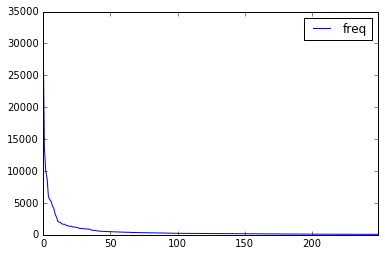

In [149]:
lemmeFilm3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [150]:
film3=verb3[(verb3["9_freqfilms2"]!=0)][["3_lemme","1_ortho","9_freqfilms2","infover"]]
film3.columns=["lemme","ortho","freq","cases"]

In [151]:
freqTableFilms=pd.pivot_table(film3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [152]:
freqTableFilms.set_index("lemme")

cases,cnd:pre:1p;,cnd:pre:1s;,cnd:pre:1s;cnd:pre:2s;,cnd:pre:2p;,cnd:pre:2s;,cnd:pre:3p;,cnd:pre:3s;,imp:pre:1p;,imp:pre:1p;ind:imp:1p;ind:pre:1p;,imp:pre:1p;ind:pre:1p;,...,sub:imp:2s;,sub:imp:3p;,sub:imp:3s;,sub:pre:1p;,sub:pre:1s;,sub:pre:1s;sub:pre:3s;,sub:pre:2p;,sub:pre:2s;,sub:pre:3p;,sub:pre:3s;
lemme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,0.13,NaN,NaN,0.01,0.02,0.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,0.01,NaN,0.93,0.23,NaN,0.02,0.23,NaN,NaN,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,0.10,0.02,NaN,0.03,0.63,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,0.58,NaN,0.11,NaN,NaN
abdiquer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abonder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
cellOrder=[c for c in freqTableFilms.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableFilms.columns[1:] if ";" in c[:-1]]
cellOrder

['cnd:pre:1p;',
 'cnd:pre:1s;',
 'cnd:pre:2p;',
 'cnd:pre:2s;',
 'cnd:pre:3p;',
 'cnd:pre:3s;',
 'imp:pre:1p;',
 'imp:pre:2p;',
 'imp:pre:2s;',
 'ind:fut:1p;',
 'ind:fut:1s;',
 'ind:fut:2p;',
 'ind:fut:2s;',
 'ind:fut:3p;',
 'ind:fut:3s;',
 'ind:imp:1p;',
 'ind:imp:1s;',
 'ind:imp:2p;',
 'ind:imp:2s;',
 'ind:imp:3p;',
 'ind:imp:3s;',
 'ind:pas:1p;',
 'ind:pas:1s;',
 'ind:pas:2p;',
 'ind:pas:2s;',
 'ind:pas:3p;',
 'ind:pas:3s;',
 'ind:pre:1p;',
 'ind:pre:1s;',
 'ind:pre:2p;',
 'ind:pre:2s;',
 'ind:pre:3p;',
 'ind:pre:3s;',
 'inf;',
 'par:pas:fp;',
 'par:pas:fs;',
 'par:pas:mp;',
 'par:pas:ms;',
 'par:pre;',
 'sub:imp:1p;',
 'sub:imp:1s;',
 'sub:imp:2p;',
 'sub:imp:2s;',
 'sub:imp:3p;',
 'sub:imp:3s;',
 'sub:pre:1p;',
 'sub:pre:1s;',
 'sub:pre:2p;',
 'sub:pre:2s;',
 'sub:pre:3p;',
 'sub:pre:3s;',
 'cnd:pre:1s;cnd:pre:2s;',
 'imp:pre:1p;ind:imp:1p;ind:pre:1p;',
 'imp:pre:1p;ind:pre:1p;',
 'imp:pre:1p;ind:pre:1p;inf;',
 'imp:pre:1p;ind:pre:1p;sub:pre:2s;',
 'imp:pre:1p;sub:pre:1p;',
 'imp:

In [154]:
freqTableFilms=freqTableFilms.reindex_axis(["lemme"]+cellOrder, axis=1)

In [155]:
freqTableFilms.columns=[c.strip(";") for c in freqTableFilms.columns]

In [159]:
simplesCases=freqTableFilms.sum()[1:52]
multiplesCases=freqTableFilms.sum()[52:]
refFreq=simplesCases.copy()


In [160]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqFilms=refFreq

cnd:pre:1s 15.63 1505.8150644
cnd:pre:2s 1.45 139.694935597
imp:pre:1p 8.57 69.484851411
imp:pre:2p 83.77 812.97112695
imp:pre:2s 1.98 59.5292654642
ind:fut:2s 777.85 792.872430464
ind:fut:3p 439.54 457.73457281
ind:fut:3s 2746.31 2777.59770448
ind:imp:1p 186.06 205.747181025
ind:imp:1s 23.29 3524.8661178
ind:imp:2p 390.27 567.765148422
ind:imp:2s 0.65 98.3753961601
ind:imp:3p 500.07 534.115765772
ind:imp:3s 5678.29 5842.82882727
ind:pas:1s 39.47 106.630535753
ind:pas:2s 10.23 26.9898982134
ind:pas:3p 81.23 81.3279404439
ind:pas:3s 549.1 587.316169491
ind:pre:1p 380.22 2499.05210222
ind:pre:1s 4269.23 17164.5271469
ind:pre:2p 1446.42 12281.5413928
ind:pre:2s 3892.51 14623.7507298
ind:pre:3p 4388.51 5437.96010213
ind:pre:3s 32875.82 58420.5799441
inf 31556.43 34970.7067138
par:pas:fp 414.96 599.428530888
par:pas:fs 2960.69 3094.63065645
par:pas:mp 1357.19 1610.44561495
par:pas:ms 17978.32 21246.8880824
sub:imp:1s 1.73 1.86456555202
sub:imp:3p 0.86 0.860574068716
sub:pre:1p 9.09 24.67848

ind:imp:3p 531.740737347 531.740733619
ind:imp:3s 5837.74960848 5837.74246821
ind:pas:1s 113.535824633 113.534409211
ind:pas:2s 28.828774011 28.8294810803
ind:pas:3p 81.3238012117 81.3238008728
ind:pas:3s 577.583595908 577.585515072
ind:pre:1p 2466.41429105 2464.52234784
ind:pre:1s 22881.996947 22870.4348037
ind:pre:2p 12102.9125417 12089.738247
ind:pre:2s 12728.678027 12725.2073536
ind:pre:3p 5440.45817047 5440.45822947
ind:pre:3s 54920.7345217 54916.1299412
inf 34110.4410772 34110.4922571
par:pas:fp 443.544189435 443.546651625
par:pas:fs 3091.79440324 3091.79468271
par:pas:mp 1575.69799944 1575.6603943
par:pas:ms 20808.1587546 20807.9897565
sub:imp:1s 1.78421672099 1.78421502863
sub:pre:1p 11.9561767862 11.9286980933
sub:pre:1s 33.5429553874 30.9853747311
sub:pre:2p 43.6965778971 43.623246886
sub:pre:2s 340.695686015 338.721861937
sub:pre:3p 93.5554186862 93.5554184037
sub:pre:3s 1504.48802209 1505.56060818
imp:pre:1p 197.483596289 199.26741047
imp:pre:2p 1482.04150071 1493.33431982


ind:imp:3s 5837.71575584 5837.71314955
ind:pas:1s 113.530115174 113.52976182
ind:pas:2s 28.8315128338 28.8316684294
ind:pas:3p 81.3237997945 81.3237997015
ind:pas:3s 577.591813352 577.59236725
ind:pre:1p 2457.97607498 2457.40147991
ind:pre:1s 22826.0372039 22821.8243744
ind:pre:2p 12040.6393897 12035.8580777
ind:pre:2s 12714.4517018 12713.5291864
ind:pre:3p 5440.45843381 5440.45845173
ind:pre:3s 54900.698868 54899.3222426
inf 34110.7366085 34110.7643311
par:pas:fp 443.554476134 443.55511628
par:pas:fs 3091.79160384 3091.7908725
par:pas:mp 1575.53298583 1575.52177688
par:pas:ms 20807.3508727 20807.2907943
sub:imp:1s 1.78421028731 1.7842099346
sub:pre:1p 11.8410280544 11.8338338046
sub:pre:1s 18.520501725 16.9814917727
sub:pre:2p 43.3670317967 43.343406987
sub:pre:2s 332.635594627 332.154888421
sub:pre:3p 93.5554174043 93.5554173145
sub:pre:3s 1512.28939074 1513.23933855
imp:pre:1p 205.353674158 205.881788672
imp:pre:2p 1535.40431732 1539.49983089
imp:pre:2s 979.009851695 985.543309479
i

ind:pas:1s 113.528293976 113.528205907
ind:pas:2s 28.8322882738 28.8323238149
ind:pas:3p 81.3237993136 81.3237992907
ind:pas:3s 577.594696231 577.594835525
ind:pre:1p 2455.12336898 2455.00314751
ind:pre:1s 22804.0133546 22802.9554306
ind:pre:2p 12014.8190769 12013.522339
ind:pre:2s 12709.6069268 12709.3665013
ind:pre:3p 5440.45852261 5440.45852633
ind:pre:3s 54893.4889182 54893.1363538
inf 34110.8927206 34110.900793
par:pas:fp 443.557630598 443.557767353
par:pas:fs 3091.78620457 3091.78580203
par:pas:mp 1575.47521476 1575.47246882
par:pas:ms 20807.0368654 20807.0217345
sub:imp:1s 1.78420854324 1.78420846391
sub:pre:1p 11.8060141151 11.8045730012
sub:pre:1s 8.9460119554 8.34035906838
sub:pre:2p 43.2420208118 43.2359049598
sub:pre:2s 330.311860886 330.214405694
sub:pre:3p 93.5554169519 93.5554169323
sub:pre:3s 1518.49330264 1518.90713236
imp:pre:1p 207.968141807 208.078191118
imp:pre:2p 1557.51857437 1558.62902703
imp:pre:2s 1013.44989748 1015.14772181
ind:fut:2s 792.535735926 792.535735

par:pas:fs 3091.7833703 3091.78323919
par:pas:mp 1575.45878923 1575.45818348
par:pas:ms 20806.9463205 20806.9429861
sub:imp:1s 1.78420807199 1.78420805479
sub:pre:1p 11.7983624948 11.7981529577
sub:pre:1s 4.86786674984 4.68882081383
sub:pre:2p 43.2061267203 43.2049030677
sub:pre:2s 329.764949999 329.747017546
sub:pre:3s 1521.32423554 1521.4509312
imp:pre:1p 208.554847283 208.571004972
imp:pre:2p 1564.07505334 1564.30024315
imp:pre:2s 1023.75780567 1024.14707769
ind:fut:2s 792.535732147 792.535732009
ind:fut:3p 452.18723752 452.187251735
ind:fut:3s 2777.24338183 2777.24338147
ind:imp:1p 205.493039056 205.493057868
ind:imp:1s 3525.71433547 3525.71419654
ind:imp:2p 566.214209355 566.214571872
ind:imp:2s 98.3990690449 98.3990651675
ind:imp:3p 531.740778153 531.7407787
ind:imp:3s 5837.69737963 5837.69725696
ind:pas:1s 113.527739069 113.527721237
ind:pas:2s 28.8325071614 28.8325139329
ind:pas:3s 577.595565057 577.595592445
ind:pre:1p 2454.46814469 2454.45371308
ind:pre:1s 22797.4761875 22797

sub:imp:1s 1.78420794583 1.78420794342
sub:pre:1p 11.7971362495 11.7971235176
sub:pre:1s 3.46093830847 3.43126137572
sub:pre:2p 43.1979658619 43.1978461014
sub:pre:2s 329.639652481 329.637429114
sub:pre:3s 1522.32568918 1522.34696894
imp:pre:1p 208.649537516 208.650524546
imp:pre:2p 1565.57900518 1565.60111243
imp:pre:2s 1026.65161587 1026.70820716
ind:fut:3p 452.187342934 452.187344988
ind:imp:1p 205.493149126 205.493150268
ind:imp:1s 3525.71330812 3525.71328818
ind:imp:2p 566.216627077 566.216662557
ind:imp:2s 98.3990403726 98.3990398161
ind:imp:3p 531.740782527 531.740782621
ind:imp:3s 5837.69656614 5837.69655445
ind:pas:1s 113.52760583 113.527603205
ind:pas:2s 28.8325570642 28.8325580276
ind:pas:3s 577.595768154 577.595772111
ind:pre:1p 2454.38565154 2454.38488564
ind:pre:1s 22795.985412 22795.9566747
ind:pre:2p 12005.3803075 12005.357977
ind:pre:2s 12707.7031958 12707.6957465
ind:pre:3s 54890.7478997 54890.7375699
inf 34110.9460044 34110.9460173
par:pas:fp 443.558581156 443.558583

ind:imp:3s 5837.69649357 5837.69649188
ind:pas:1s 113.527587097 113.527586505
ind:pas:2s 28.8325639154 28.8325641307
ind:pas:3s 577.595796344 577.595797232
ind:pre:1p 2454.38169817 2454.38164576
ind:pre:1s 22795.7811093 22795.7746919
ind:pre:2p 12005.2400305 12005.2366435
ind:pre:2s 12707.6499373 12707.6482514
ind:pre:3s 54890.6742278 54890.6719037
inf 34110.9458314 34110.9458114
par:pas:fp 443.558598798 443.558599317
par:pas:fs 3091.78215525 3091.78215056
par:pas:mp 1575.45369585 1575.45367868
par:pas:ms 20806.9183404 20806.9182465
sub:imp:1s 1.78420792813 1.78420792765
sub:pre:1p 11.7970640223 11.7970629435
sub:pre:1s 3.23986116298 3.2337275739
sub:pre:2p 43.1971954588 43.19717975
sub:pre:2s 329.62360511 329.623178314
sub:pre:3s 1522.48439818 1522.48880804
imp:pre:1p 208.655148159 208.655232566
imp:pre:2p 1565.72123619 1565.72413676
imp:pre:2s 1027.06770371 1027.07905148
ind:fut:3p 452.187358027 452.187358438
ind:imp:1p 205.4931556 205.493155696
ind:imp:1s 3525.71316173 3525.71315774

ind:pre:2s 12707.637806 12707.6374187
ind:pre:3s 54890.657518 54890.6569852
inf 34110.9456456 34110.9456374
par:pas:fp 443.558602434 443.558602545
par:pas:fs 3091.78212136 3091.78212028
par:pas:mp 1575.45357247 1575.45356853
par:pas:ms 20806.9176654 20806.9176439
sub:pre:1p 11.797058068 11.7970579633
sub:pre:1s 3.19560089565 3.19418297299
sub:pre:2p 43.1970967802 43.1970943977
sub:pre:2s 329.620552372 329.620455695
sub:pre:3s 1522.5162295 1522.51724965
imp:pre:1p 208.65561621 208.65562457
imp:pre:2p 1565.739457 1565.73989694
imp:pre:2s 1027.14930151 1027.15190363
ind:fut:3p 452.187360983 452.187361078
ind:imp:1s 3525.71313308 3525.71313217
ind:imp:2p 566.21688455 566.216885256
ind:imp:2s 98.3990354875 98.399035462
ind:pas:1s 113.527582707 113.527582586
ind:pas:2s 28.8325655111 28.8325655551
ind:pas:3s 577.595802928 577.59580311
ind:pre:1p 2454.38148629 2454.38148774
ind:pre:1s 22795.7335508 22795.7322402
ind:pre:2p 12005.2182408 12005.2177965
ind:pre:2s 12707.6374187 12707.6370728
ind:

sub:pre:3s 1522.52382695 1522.52403766
imp:pre:1p 208.655662618 208.655663256
imp:pre:2p 1565.74228721 1565.74234492
imp:pre:2s 1027.16865738 1027.16919339
ind:imp:2p 566.216889091 566.216889184
ind:pas:1s 113.527581806 113.527581781
ind:pas:2s 28.8325658382 28.8325658472
ind:pre:1p 2454.38151277 2454.38151415
ind:pre:1s 22795.7238043 22795.7235345
ind:pre:2p 12005.2153827 12005.2153244
ind:pre:2s 12707.6348446 12707.6347733
ind:pre:3s 54890.6534452 54890.6533472
par:pas:mp 1575.45354242 1575.4535417
par:pas:ms 20806.917501 20806.9174971
sub:pre:1p 11.797057487 11.7970574809
sub:pre:1s 3.18474919888 3.18448758504
sub:pre:2p 43.19708114 43.1970808697
sub:pre:2s 329.619814612 329.619796892
sub:pre:3s 1522.52403766 1522.52422593
imp:pre:1p 208.655663256 208.655663784
imp:pre:2p 1565.74234492 1565.74239483
imp:pre:2s 1027.16919339 1027.16967224
ind:imp:2p 566.216889184 566.216889264
ind:pas:1s 113.527581781 113.527581759
ind:pas:2s 28.8325658472 28.8325658553
ind:pre:1p 2454.38151415 2454.

sub:pre:1s 3.18255194888 3.18252447131
sub:pre:2p 43.1970792485 43.1970792337
sub:pre:2s 329.619665904 329.619664047
sub:pre:3s 1522.52561889 1522.52563867
imp:pre:2p 1565.74269415 1565.74269689
imp:pre:2s 1027.1732139 1027.17326416
ind:pre:1s 22795.721511 22795.7214857
ind:pre:2p 12005.2149719 12005.2149691
ind:pre:2s 12707.6342382 12707.6342316
ind:pre:3s 54890.6526118 54890.6526026
sub:pre:1s 3.18252447131 3.18249992174
sub:pre:2p 43.1970792337 43.1970792209
sub:pre:2s 329.619664047 329.619662387
sub:pre:3s 1522.52563867 1522.52565633
imp:pre:2p 1565.74269689 1565.74269926
imp:pre:2s 1027.17326416 1027.17330906
ind:pre:1s 22795.7214857 22795.7214631
ind:pre:2p 12005.2149691 12005.2149667
ind:pre:2s 12707.6342316 12707.6342256
ind:pre:3s 54890.6526026 54890.6525944
sub:pre:1s 3.18249992174 3.18247798815
sub:pre:2p 43.1970792209 43.1970792098
sub:pre:2s 329.619662387 329.619660904
sub:pre:3s 1522.52565633 1522.52567212
imp:pre:2p 1565.74269926 1565.74270131
imp:pre:2s 1027.17330906 10

imp:pre:2s 1027.1736822 1027.17368255
sub:pre:1s 3.18229570697 3.18229553441
imp:pre:2s 1027.17368255 1027.17368287
sub:pre:1s 3.18229553441 3.18229538024
imp:pre:2s 1027.17368287 1027.17368315
sub:pre:1s 3.18229538024 3.1822952425
imp:pre:2s 1027.17368315 1027.1736834
sub:pre:1s 3.1822952425 3.18229511944
imp:pre:2s 1027.1736834 1027.17368363
sub:pre:1s 3.18229511944 3.18229500949
imp:pre:2s 1027.17368363 1027.17368383
sub:pre:1s 3.18229500949 3.18229491126
imp:pre:2s 1027.17368383 1027.17368401
sub:pre:1s 3.18229491126 3.18229482349
imp:pre:2s 1027.17368401 1027.17368417
sub:pre:1s 3.18229482349 3.18229474508
imp:pre:2s 1027.17368417 1027.17368431
sub:pre:1s 3.18229474508 3.18229467502
imp:pre:2s 1027.17368431 1027.17368444
sub:pre:1s 3.18229467502 3.18229461243
imp:pre:2s 1027.17368444 1027.17368455
sub:pre:1s 3.18229461243 3.18229455651
sub:pre:1s 3.18229455651 3.18229450654
sub:pre:1s 3.18229450654 3.1822944619
sub:pre:1s 3.1822944619 3.18229442202
sub:pre:1s 3.18229442202 3.18229

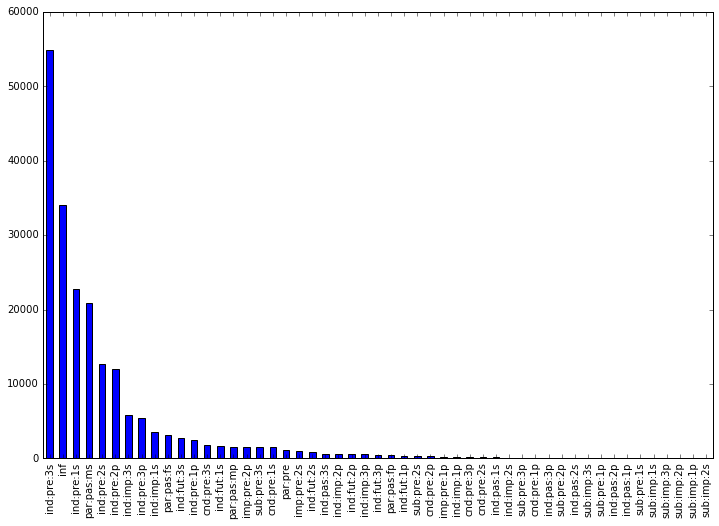

In [161]:
refFreqFilms.sort_values(ascending=False).plot(kind="bar",figsize=(12,8))

### Pour Frantext

In [162]:
lemmeFrantext3=verb3[(verb3["8_freqlemlivres"]!=0)][["3_lemme","1_ortho","8_freqlemlivres"]]
lemmeFrantext3.columns=["lemme","ortho","freq"]

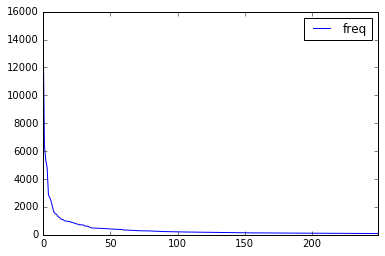

In [163]:
lemmeFrantext3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [164]:
frantext3=verb3[(verb3["10_freqlivres"]!=0)][["3_lemme","1_ortho","10_freqlivres","infover"]]
frantext3.columns=["lemme","ortho","freq","cases"]

In [165]:
freqTableTexte=pd.pivot_table(frantext3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [166]:
freqTableTexte.set_index("lemme")

cases,cnd:pre:1p;,cnd:pre:1s;,cnd:pre:1s;cnd:pre:2s;,cnd:pre:2p;,cnd:pre:2s;,cnd:pre:3p;,cnd:pre:3s;,imp:pre:1p;,imp:pre:1p;ind:imp:1p;ind:pre:1p;,imp:pre:1p;ind:pre:1p;,...,sub:imp:2s;,sub:imp:3p;,sub:imp:3s;,sub:pre:1p;,sub:pre:1s;,sub:pre:1s;sub:pre:3s;,sub:pre:2p;,sub:pre:2s;,sub:pre:3p;,sub:pre:3s;
lemme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,NaN,NaN,NaN,0.07,0.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,NaN,NaN,0.27,0.20,NaN,0.14,0.88,NaN,NaN,0.68,...,NaN,NaN,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,0.07,NaN,NaN,0.07,0.41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN
abdiquer,NaN,0.07,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aberrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
cellOrder=[c for c in freqTableTexte.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableTexte.columns[1:] if ";" in c[:-1]]
cellOrder

['cnd:pre:1p;',
 'cnd:pre:1s;',
 'cnd:pre:2p;',
 'cnd:pre:2s;',
 'cnd:pre:3p;',
 'cnd:pre:3s;',
 'imp:pre:1p;',
 'imp:pre:2p;',
 'imp:pre:2s;',
 'ind:fut:1p;',
 'ind:fut:1s;',
 'ind:fut:2p;',
 'ind:fut:2s;',
 'ind:fut:3p;',
 'ind:fut:3s;',
 'ind:imp:1p;',
 'ind:imp:1s;',
 'ind:imp:2p;',
 'ind:imp:2s;',
 'ind:imp:3p;',
 'ind:imp:3s;',
 'ind:pas:1p;',
 'ind:pas:1s;',
 'ind:pas:2p;',
 'ind:pas:2s;',
 'ind:pas:3p;',
 'ind:pas:3s;',
 'ind:pre:1p;',
 'ind:pre:1s;',
 'ind:pre:2p;',
 'ind:pre:2s;',
 'ind:pre:3p;',
 'ind:pre:3s;',
 'inf;',
 'par:pas:fp;',
 'par:pas:fs;',
 'par:pas:mp;',
 'par:pas:ms;',
 'par:pre;',
 'sub:imp:1p;',
 'sub:imp:1s;',
 'sub:imp:2p;',
 'sub:imp:2s;',
 'sub:imp:3p;',
 'sub:imp:3s;',
 'sub:pre:1p;',
 'sub:pre:1s;',
 'sub:pre:2p;',
 'sub:pre:2s;',
 'sub:pre:3p;',
 'sub:pre:3s;',
 'cnd:pre:1s;cnd:pre:2s;',
 'imp:pre:1p;ind:imp:1p;ind:pre:1p;',
 'imp:pre:1p;ind:pre:1p;',
 'imp:pre:1p;ind:pre:1p;inf;',
 'imp:pre:1p;ind:pre:1p;sub:pre:2s;',
 'imp:pre:1p;sub:pre:1p;',
 'imp:

In [168]:
freqTableTexte=freqTableTexte.reindex_axis(["lemme"]+cellOrder, axis=1)

In [169]:
freqTableTexte.columns=[c.strip(";") for c in freqTableTexte.columns]

In [170]:
simplesCases=freqTableTexte.sum()[1:52]
multiplesCases=freqTableTexte.sum()[52:]
refFreq=simplesCases.copy()

In [171]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqTexte=refFreq

cnd:pre:1s 24.45 551.259769891
cnd:pre:2s 1.19 26.8302301092
imp:pre:1p 7.99 59.5072451325
imp:pre:2p 21.23 149.248966915
imp:pre:2s 1.4 17.3565858681
ind:fut:2s 236.61 241.064817261
ind:fut:3p 247.82 264.98743433
ind:fut:3s 1075.49 1077.46447486
ind:imp:1p 546.77 596.469706515
ind:imp:1s 169.77 3379.02727019
ind:imp:2p 115.12 155.299247338
ind:imp:2s 1.05 20.8987373134
ind:imp:3p 4086.82 4413.77577052
ind:imp:3s 20665.92 20934.2007854
ind:pas:1s 839.53 1263.63873511
ind:pas:2s 7.18 13.0497142788
ind:pas:3p 1085.52 1086.01453102
ind:pas:3s 9582.42 10636.743247
ind:pre:1p 130.79 879.570817492
ind:pre:1s 948.93 4566.73208183
ind:pre:2p 331.71 2018.50951168
ind:pre:2s 635.94 2588.9548521
ind:pre:3p 3649.25 4664.51207882
ind:pre:3s 12580.95 26144.116145
inf 25634.3 27510.0452264
par:pas:fp 1269.9 1406.09274231
par:pas:fs 4111.08 4169.47035529
par:pas:mp 2343.17 2873.83285808
par:pas:ms 15144.42 18566.2891909
sub:imp:1s 17.12 26.5166677495
sub:imp:3p 44.24 44.2910255612
sub:pre:1p 6.62 12.5

ind:pre:1s 7049.23058758 7043.67749929
ind:pre:2p 2068.91249235 2067.25768765
ind:pre:2s 1916.61222048 1914.86028315
ind:pre:3p 4688.19957957 4688.19964113
ind:pre:3s 25050.9788507 25048.1931532
inf 27403.6437784 27403.6738171
par:pas:fp 1334.45127443 1334.45269014
par:pas:fs 4166.81004633 4166.81088535
par:pas:mp 2778.61600758 2778.55543546
par:pas:ms 18130.8727064 18130.8624081
sub:imp:1s 25.41283958 25.4126414058
sub:pre:1p 8.23020746043 8.21861490802
sub:pre:1s 29.6079188885 27.4039974988
sub:pre:2p 12.5191508641 12.5003585093
sub:pre:2s 75.2834822417 74.7342050407
sub:pre:3p 93.2868939643 93.2868936056
sub:pre:3s 946.46749092 947.551445613
imp:pre:1p 106.494723116 107.375592755
imp:pre:2p 248.050072001 249.371875455
imp:pre:2s 227.358335385 238.089769627
ind:fut:2s 240.924033903 240.924026929
ind:fut:3p 260.413954522 260.414636067
ind:fut:3s 1077.33672514 1077.33671684
ind:imp:1p 596.303548724 596.304494302
ind:imp:1s 3381.53379325 3381.53361801
ind:imp:2p 154.847954536 154.852525

ind:fut:3s 1077.33667864 1077.33667765
ind:imp:1p 596.308661734 596.308734444
ind:imp:1s 3381.53036435 3381.53025071
ind:imp:2p 154.870565228 154.8708154
ind:imp:2s 20.9142185461 20.9142178432
ind:imp:3s 20924.0041813 20924.0041208
ind:pas:1s 1169.25477237 1169.25108291
ind:pas:2s 15.413196336 15.4132136276
ind:pas:3p 1085.98137629 1085.98137597
ind:pas:3s 10353.4300136 10353.4370967
ind:pre:1p 858.538434673 858.46980698
ind:pre:1s 6995.14567218 6993.78291926
ind:pre:2p 2060.23562995 2060.15334194
ind:pre:2s 1906.02011692 1905.81685999
ind:pre:3p 4688.19993786 4688.19994229
ind:pre:3s 25033.4953103 25033.1494178
inf 27403.7767039 27403.776457
par:pas:fp 1334.45922241 1334.45932122
par:pas:fs 4166.81305968 4166.81306032
par:pas:mp 2778.1893631 2778.18047002
par:pas:ms 18130.4526987 18130.4396395
sub:imp:1s 25.4121922018 25.4121847337
sub:pre:1p 8.16660187132 8.1658528841
sub:pre:1s 10.2942612933 9.86834437342
sub:pre:2p 12.4251745936 12.4243338416
sub:pre:2s 71.861944557 71.802321535
su

imp:pre:1p 111.979201994 111.988831805
imp:pre:2p 255.299004858 255.306259067
imp:pre:2s 322.907266563 323.326688804
ind:fut:2s 240.924007962 240.924007897
ind:fut:3p 260.418841611 260.418860982
ind:fut:3s 1077.33667236 1077.33667217
ind:imp:1p 596.30905686 596.309065597
ind:imp:1s 3381.52963063 3381.52960766
ind:imp:2p 154.871815934 154.871838429
ind:imp:2s 20.9142140081 20.9142138661
ind:imp:3s 20924.0039923 20924.0039956
ind:pas:1s 1169.23156923 1169.23087141
ind:pas:2s 15.4133059641 15.413309298
ind:pas:3s 10353.4750938 10353.4764716
ind:pre:1p 858.170119422 858.162329038
ind:pre:1s 6986.35368632 6986.07917291
ind:pre:2p 2059.82322036 2059.81578048
ind:pre:2s 1904.73156691 1904.6923315
ind:pre:3p 4688.19996169 4688.19996219
ind:pre:3s 25031.3029947 25031.236398
inf 27403.771574 27403.7712508
par:pas:fp 1334.45978273 1334.45979683
par:pas:fs 4166.81306928 4166.8130709
par:pas:mp 2778.13284836 2778.13112043
par:pas:ms 18130.3679957 18130.3653247
sub:imp:1s 25.4121454221 25.4121440421

ind:imp:1s 3381.52947588 3381.52947309
ind:imp:2p 154.871933701 154.871934815
ind:imp:2s 20.9142130511 20.9142130338
ind:pas:1s 1169.2269255 1169.22684347
ind:pas:2s 15.4133282056 15.4133285999
ind:pas:3s 10353.4842968 10353.4844603
ind:pre:1p 858.127006883 858.126545387
ind:pre:1s 6984.50687968 6984.47366699
ind:pre:2p 2059.78426876 2059.78390034
ind:pre:2s 1904.46941818 1904.46475522
ind:pre:3s 25030.8589072 25030.8510406
inf 27403.769064 27403.7690088
par:pas:fp 1334.45987121 1334.45987261
par:pas:fs 4166.81308685 4166.81308741
par:pas:mp 2778.12128674 2778.12108059
par:pas:ms 18130.3499514 18130.3496245
sub:imp:1s 25.4121363653 25.4121362099
sub:pre:1p 8.16200687171 8.1620005671
sub:pre:1s 7.23594183524 7.22832005646
sub:pre:2p 12.4205732947 12.4205695459
sub:pre:2s 71.4081554691 71.4067456812
sub:pre:3s 960.03930083 960.044085105
imp:pre:1p 112.035445573 112.036022379
imp:pre:2p 255.337349113 255.337643322
imp:pre:2s 325.769465846 325.813039866
ind:fut:3p 260.418973328 260.4189753

ind:pre:2p 2059.78239031 2059.78236312
ind:pre:2s 1904.43998269 1904.43926727
ind:pre:3s 25030.8093083 25030.8081055
inf 27403.7687009 27403.7686915
par:pas:fp 1334.45987987 1334.45988008
par:pas:mp 2778.11998469 2778.11995302
par:pas:ms 18130.347879 18130.3478283
sub:imp:1s 25.4121353941 25.4121353709
sub:pre:1p 8.1619722783 8.16197167841
sub:pre:1s 7.1888716796 7.1877728951
sub:pre:2p 12.4205541744 12.4205538974
sub:pre:2s 71.3992036598 71.3989837667
sub:pre:3s 960.068588028 960.069260112
imp:pre:1p 112.038635741 112.038692403
imp:pre:2p 255.338849592 255.338871324
imp:pre:2s 326.044662382 326.051355822
ind:fut:3p 260.418985891 260.418986196
ind:imp:1s 3381.52945778 3381.52945741
ind:imp:2p 154.871939467 154.871939534
ind:imp:2s 20.9142129391 20.9142129368
ind:pas:1s 1169.22639607 1169.22638524
ind:pas:2s 15.4133307525 15.4133308047
ind:pas:3s 10353.4853533 10353.4853749
ind:pre:1p 858.124607397 858.124581532
ind:pre:1s 6984.29162747 6984.28719115
ind:pre:2p 2059.78236312 2059.782340

par:pas:mp 2778.11977309 2778.11976999
par:pas:ms 18130.3475395 18130.3475345
sub:pre:1p 8.16196891286 8.16196888317
sub:pre:1s 7.18163585348 7.18153268209
sub:pre:2p 12.4205527115 12.4205527003
sub:pre:2s 71.3977296058 71.3977078547
sub:pre:3s 960.072986255 960.073048186
imp:pre:1p 112.0389586 112.038961631
imp:pre:2p 255.338964349 255.338965226
imp:pre:2s 326.089375281 326.090030678
ind:fut:3p 260.418987926 260.418987955
ind:pas:1s 1169.2263238 1169.22632275
ind:pas:2s 15.4133311006 15.4133311057
ind:pas:3s 10353.4854978 10353.4855
ind:pre:1s 6984.26197367 6984.26153849
ind:pre:2p 2059.78224577 2059.78224487
ind:pre:2s 1904.43513447 1904.43507394
ind:pre:3s 25030.8011638 25030.8010623
par:pas:mp 2778.11976999 2778.11976731
par:pas:ms 18130.3475345 18130.3475301
sub:pre:1p 8.16196888317 8.16196885873
sub:pre:1s 7.18153268209 7.18144364862
sub:pre:2p 12.4205527003 12.4205526911
sub:pre:2s 71.3977078547 71.3976890432
sub:pre:3s 960.073048186 960.073101587
imp:pre:1p 112.038961631 112.03

imp:pre:2s 326.094154277 326.094161379
ind:pre:1s 6984.25879937 6984.25879465
ind:pre:2s 1904.4346932 1904.43469254
sub:pre:1s 7.18088881548 7.18088787861
sub:pre:2s 71.3975704422 71.3975702371
sub:pre:3s 960.073432906 960.07343346
imp:pre:2s 326.094161379 326.094167516
ind:pre:1s 6984.25879465 6984.25879057
ind:pre:2s 1904.43469254 1904.43469198
sub:pre:1s 7.18088787861 7.18088706951
sub:pre:2s 71.3975702371 71.3975700598
sub:pre:3s 960.07343346 960.073433939
imp:pre:2s 326.094167516 326.094172817
ind:pre:1s 6984.25879057 6984.25878704
ind:pre:2s 1904.43469198 1904.43469149
sub:pre:1s 7.18088706951 7.18088637074
sub:pre:2s 71.3975700598 71.3975699067
sub:pre:3s 960.073433939 960.073434352
imp:pre:2s 326.094172817 326.094177397
ind:pre:1s 6984.25878704 6984.258784
ind:pre:2s 1904.43469149 1904.43469106
sub:pre:1s 7.18088637074 7.18088576726
sub:pre:2s 71.3975699067 71.3975697744
sub:pre:3s 960.073434352 960.073434709
imp:pre:2s 326.094177397 326.094181355
ind:pre:1s 6984.258784 6984.25

In [172]:
refFrequencies=pd.DataFrame(refFreqFilms,columns=["films"])
refFrequencies["textes"]=refFreqTexte

In [175]:
refFrequencies

,films,textes
cnd:pre:1p,90.64,60.55
cnd:pre:1s,1505.82,551.26
cnd:pre:2p,314.95,71.81
cnd:pre:2s,139.695,26.8302
cnd:pre:3p,162.75,304.61
cnd:pre:3s,1809.05,1848.44
imp:pre:1p,208.656,112.039
imp:pre:2p,1565.74,255.339
imp:pre:2s,1027.17,326.094
ind:fut:1p,332.84,144.56


In [189]:
refFrequencies.to_csv(path_or_buf=nomRepertoire+"Verbes3-FrequencesCases.csv",
                      encoding="utf8",sep="\t")

In [48]:
"""https://github.com/cognoma/genes/blob/721204091a96e55de6dcad165d6d8265e67e2a48/2.process.py#L61-L95"""

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row
    
    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [49]:
film3["case"]=film3["cases"].str[:-1]

In [50]:
splitFilm3=tidy_split(film3, "case", sep=';', keep=False)
splitFilm3

,lemme,ortho,freq,cases,case
2,avoir,a,5498.34,ind:pre:3s;,ind:pre:3s
19,abaisser,abaissai,0.10,ind:pas:1s;,ind:pas:1s
21,abaisser,abaissait,0.02,ind:imp:3s;,ind:imp:3s
23,abaisser,abaissant,0.01,par:pre;,par:pre
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,ind:pre:1s
26,abaisser,abaisse,1.28,imp:pre:2s;ind:pre:1s;ind:pre:3s;,ind:pre:3s
29,abaisser,abaissent,0.05,ind:pre:3p;,ind:pre:3p
30,abaisser,abaisser,1.09,inf;,inf
31,abaisser,abaissera,0.19,ind:fut:3s;,ind:fut:3s


In [51]:
def relativeFreqs(case,cases):
    totalFreq=sum([refFreq[c] for c in cases])
    result={}
    for c in cases:
        result[c]=float(refFreq[c])/totalFreq
#    print result,result[case]
    return result[case]

def repartitionFreqCases(row):
    cases=row["cases"][:-1].split(";")
    case=row["case"]
#    print case
    if len(cases)>1:
        relFreqCase=relativeFreqs(case,cases)
        return relFreqCase*row["freq"]
    else:
        return row["freq"]

In [52]:
splitFilm3["relFreq"]=splitFilm3.apply(repartitionFreqCases,axis=1)

In [116]:
zipfFilm3=splitFilm3["relFreq"].sort_values(ascending=False).reset_index()
zipfFilm3["Verbs Lex3 FxR"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
zipfConst=zipfFilm3["Verbs Lex3 FxR"].mean()
#zipfFilm3["FR1"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
#zipfFilm3["FR2"]=zipfFilm3["relFreq"]*np.log(zipfFilm3.index+1)*zipfConst

In [97]:
splitFilm3["relFreq"].sort_values(ascending=False).reset_index()["relFreq"][:100].plot(figsize=(20,5))

<IPython.core.display.Javascript object>


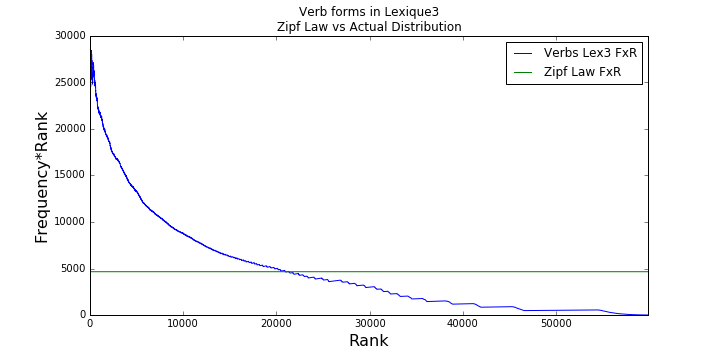

In [118]:
zipfFilm3["Zipf Law FxR"]=zipfConst
ax=zipfFilm3[["Verbs Lex3 FxR","Zipf Law FxR"]].plot(figsize=(10,5),title="Verb forms in Lexique3\nZipf Law vs Actual Distribution")
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency*Rank",fontsize=16)

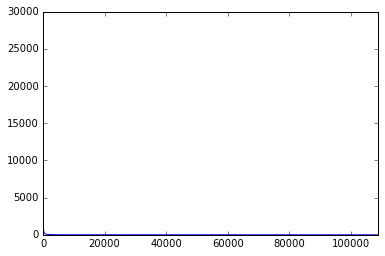

In [180]:
Lexique3[Lexique3["9_freqfilms2"]!=0]["9_freqfilms2"].sort_values(ascending=False).reset_index()["9_freqfilms2"].plot()

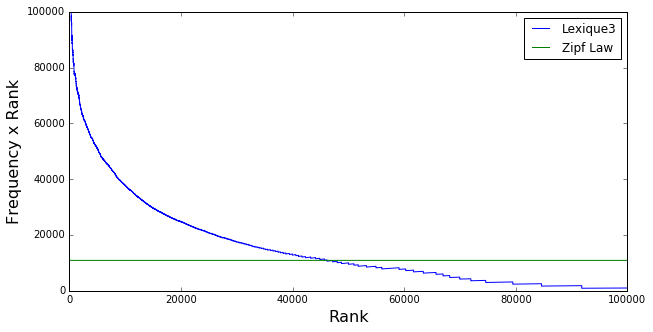

In [124]:
Lexique3["relFreq"]=Lexique3["9_freqfilms2"]
zipfLexique3=Lexique3["relFreq"].sort_values(ascending=False).reset_index()
zipfLexique3["Lexique3"]=zipfLexique3["relFreq"]*(zipfLexique3.index+1)
zipfConst=zipfLexique3["Lexique3"].mean()
zipfLexique3["Zipf Law"]=zipfConst
ax=zipfLexique3[["Lexique3","Zipf Law"]][:100000].plot(figsize=(10,5))
ax.set(xlim=(0,100000),ylim=(0,100000))
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency x Rank",fontsize=16)

# Calcul pour émergence-convergence (Morphology17)
## Intégration des -able dans Verbes3

In [58]:
nomVerbes3="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
with open(nomVerbes3,"rb") as input:
    verbes3=pickle.load(input)

In [62]:
lstVerbes3=list(set(verbes3["lexeme"].tolist()))

In [ ]:
dfVerbes3Join=verbes3.loc[verbes3["freq"]>1000000,["lexeme","case","ortho"]]

In [198]:
dfVerbes3Join

,lexeme,case,ortho
40,avoir,pi3S,a
45,abaisser,ai3S,abaissa
46,abaisser,ai1S,abaissai
47,abaisser,ii3P,abaissaient
50,abaisser,ii3S,abaissait
52,abaisser,pP,abaissant
64,abaisser,pi1S,abaisse
66,abaisser,pI2S,abaisse
67,abaisser,pi3S,abaisse
71,abaisser,pi3P,abaissent


In [63]:
dfAble=Lexique3[(Lexique3["4_cgram"]=="ADJ") & (Lexique3["3_lemme"].str.endswith("ble"))][["1_ortho","3_lemme","5_genre","6_nombre","9_freqfilms2","10_freqlivres"]]

In [64]:
dfAble["5_genre"]=dfAble["5_genre"].fillna(value="mf")

In [65]:
dfAble["freq"]=dfAble["9_freqfilms2"]+dfAble["10_freqlivres"]
dfAble["case"]=dfAble["5_genre"]+dfAble["6_nombre"]

In [66]:
sAble=dfAble.groupby("3_lemme")["freq"].sum()

In [196]:
sAble[sAble.index.str.endswith('uble')].sort_values(ascending=False)

3_lemme
double          89.45
trouble         20.32
meuble           3.35
insoluble        2.85
immeuble         2.43
indissoluble     1.08
soluble          0.75
résoluble        0.03
Name: freq, dtype: float64

In [ ]:
dfVAble=sAble.to_frame(name="freq")

In [ ]:
dfVAble["verbe"]=dfVAble.index.str[:-4]+"er"

In [70]:
dfVAble.to_csv(path_or_buf="TEMP.csv",encoding="utf8",sep=";")

In [75]:
dfVAble=pd.DataFrame.from_csv(path="TEMP.csv",encoding="utf8",sep=";")

In [84]:
dfVAbleJoin=dfVAble.reset_index()

In [86]:
dfVAbleJoin.columns=["ortho","freq","lexeme"]

In [220]:
dfVAbleJoin["case"]=u"=> able"
dfVAbleJoin

,ortho,freq,lexeme,case
0,abordable,0.67,aborder,=> able
1,absorbable,0.07,absorber,=> able
2,acceptable,8.36,accepter,=> able
3,accessible,7.80,accéder,=> able
4,achetable,0.14,acheter,=> able
5,adaptable,0.30,adapter,=> able
6,admirable,38.07,admirer,=> able
7,admissible,1.10,admettre,=> able
8,adoptable,0.07,adopter,=> able
9,adorable,33.91,adorer,=> able


In [221]:
dfForms=dfVerbes3Join.append(dfVAbleJoin).reset_index(drop=True)

In [222]:
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()

In [223]:
dfParadigmes.set_index("lexeme")

case,=> able,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
lexeme,,,,,,,,,,,,,,,,,,,,,
abaisser,None,None,abaissai,None,None,abaissèrent,abaissa,None,abaisserai,None,...,abaissées,abaissée,abaissés,abaissé,None,None,None,None,None,None
abandonner,None,abandonnâmes,abandonnai,None,abandonnas,abandonnèrent,abandonna,abandonnerons,abandonnerai,abandonnerez,...,abandonnées,abandonnée,abandonnés,abandonné,None,None,None,abandonnes,abandonnent,abandonne
abasourdir,None,None,None,None,None,None,None,None,None,None,...,None,abasourdie,abasourdis,abasourdi,None,None,None,None,None,None
abattre,None,None,abattis,None,None,abattirent,abattit,abattrons,abattrai,abattrez,...,abattues,abattue,abattus,abattu,None,None,None,abattes,None,abatte
abdiquer,None,None,abdiquai,None,None,None,abdiqua,None,None,None,...,None,abdiquée,None,abdiqué,None,None,None,None,None,None
aberrer,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
abhorrer,None,None,None,None,None,None,None,None,None,None,...,None,abhorrée,abhorrés,abhorré,None,None,None,None,None,None
abjurer,None,None,None,None,None,None,None,None,None,None,...,None,None,None,abjuré,None,None,None,None,None,None
abolir,None,None,None,None,None,None,abolit,None,None,None,...,abolies,abolie,abolis,aboli,None,None,None,None,None,None


In [224]:
def tableauPaires(paradigme):
    table=pd.DataFrame(columns=["ligne","colonne","nbPaires"])
    refCases=paradigme.columns.tolist()
    refCases.remove("lexeme")
    for n,paire in enumerate(it.combinations_with_replacement(refCases,2)):
        if paire[0] in paradigme.columns and paire[1] in paradigme.columns:
            nbPaires=len(paradigme[[paire[0],paire[1]]].dropna())
        else:
            nbPaires=0
        table.loc[2*n]=[paire[0],paire[1],nbPaires]
        table.loc[2*n+1]=[paire[1],paire[0],nbPaires]
    tableau=table.pivot_table(index="ligne",columns=["colonne"])
    return tableau

In [225]:
def sortCellFrequency(df):
    return pd.Series(np.diag(df),index=df.index).sort_values(ascending=False).index.tolist()

In [226]:
df=tableauPaires(dfParadigmes)["nbPaires"]

In [227]:
np.diag(df)

array([  345.,   355.,  1179.,    14.,   116.,  1594.,  2811.,   728.,
        1259.,   782.,   781.,  1073.,  1751.,   945.,  1909.,   785.,
         464.,  2831.,  3642.,  4704.,    12.,    78.,     7.,    13.,
         149.,   924.,  1015.,  1760.,  1845.,  3253.,   242.,   946.,
         349.,   452.,   924.,  1663.,  1289.,  2958.,  1926.,  1835.,
        3043.,  3988.,  2592.,  3319.,  3094.,  4442.,    30.,   116.,
          62.,   405.,    98.,   686.])

In [228]:
def heatmap(df):
    fig, ax = plt.subplots(figsize=(60,50))
#    ax.set_ylabel('Cells sorted by decreasing frequency')    
#    ax.set_xlabel('Cells sorted by decreasing frequency')
    sns.heatmap(df,cmap="Oranges",norm=norm,annot=True,fmt="g",cbar_kws={"ticks":bounds},ax=ax,cbar=True)
    return

In [229]:
bounds = np.array([0, 3, 10, 30, 100, 300, 1000, 5000])
norm = mplt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

[u'inf', u'ppMS', u'pi3S', u'ii3S', u'ppFS', u'pP', u'ppMP', u'pi3P', u'pi1S', u'ii3P', u'ai3S', u'ppFP', u'pi2P', u'ii1S', u'pI2S', u'pi2S', u'pI2P', u'fi3S', u'pc3S', u'ai3P', u'pi1P', u'fi1S', u'ai1S', u'fi3P', u'pI1P', u'pc1S', u'ii1P', u'pc3P', u'is3S', u'ii2P', u'fi2P', u'fi2S', u'fi1P', u'ps3S', u'ii2S', u'pc2S', u'ps2S', u'ai1P', u'pc2P', u'=> able', u'pc1P', u'is3P', u'ps1S', u'ai2S', u'ps3P', u'is1S', u'ps2P', u'ps1P', u'ai2P', u'is2S', u'is1P', u'is2P']


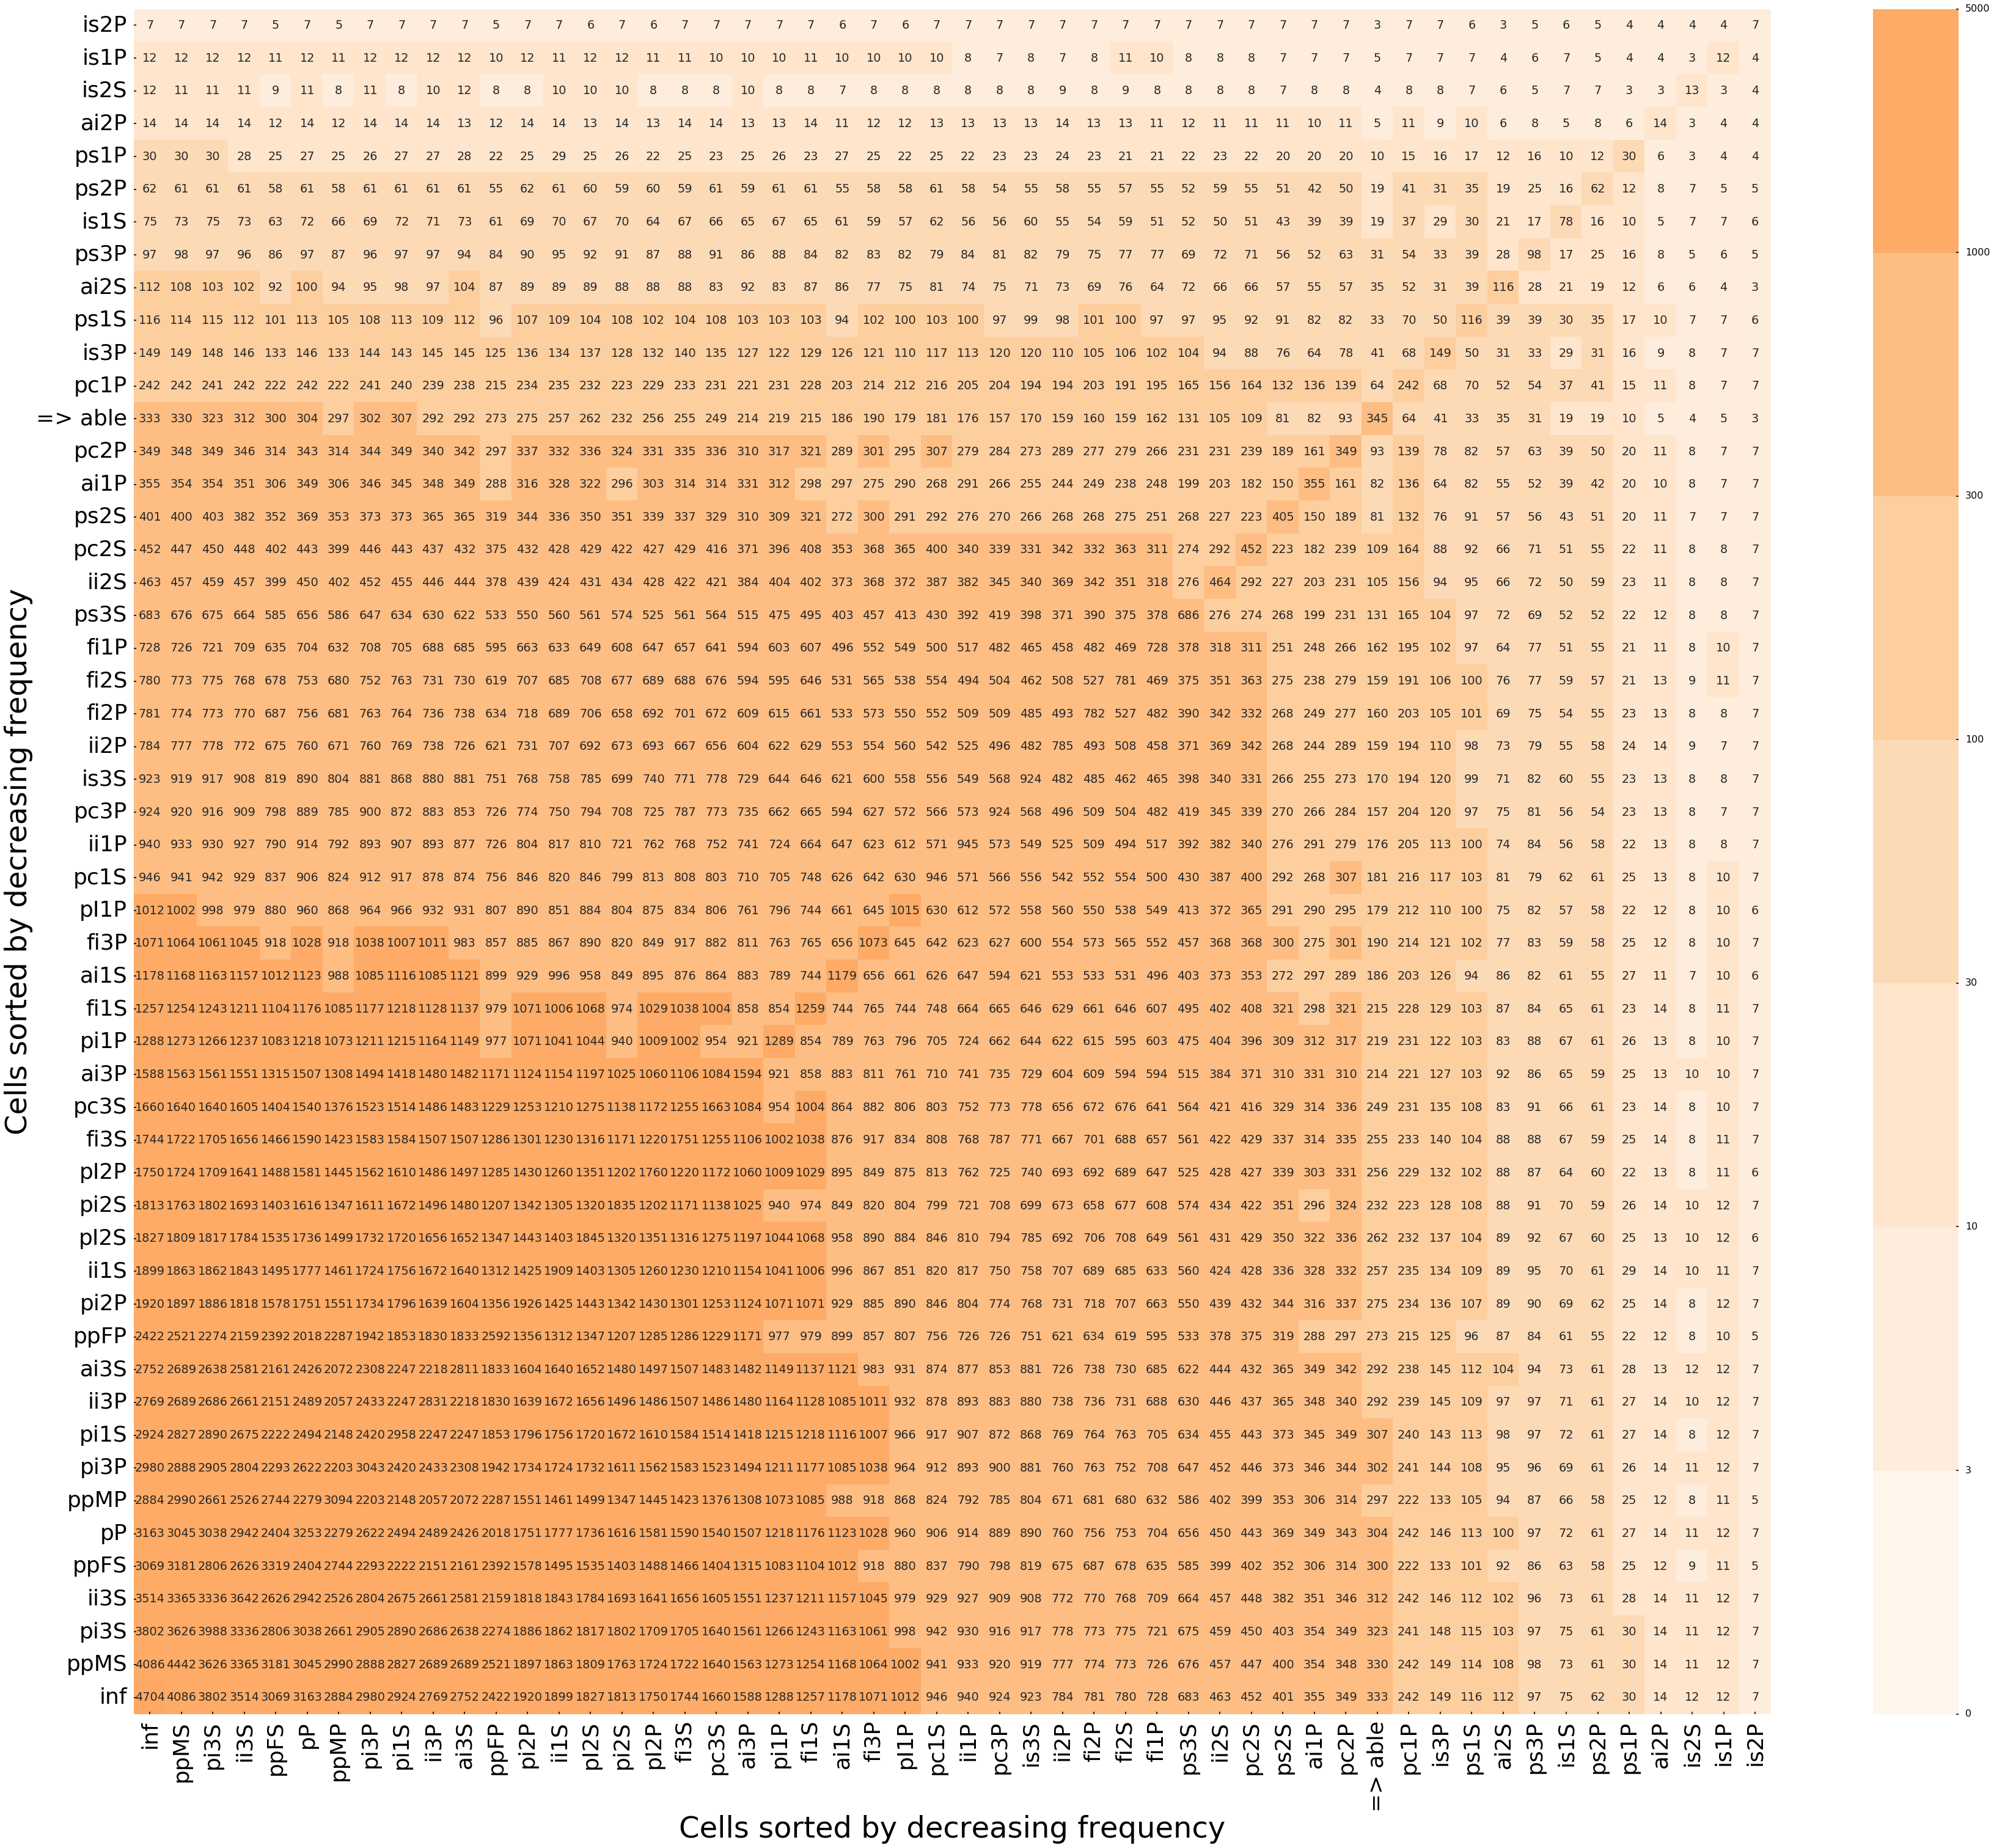

In [230]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
plt.savefig("VAble.png",dpi=150, bbox_inches="tight")

In [231]:
df.stack().quantile(.395)

179.0

In [216]:
df["=> able"].mean()

176.78846153846155